In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 데이터 확인

In [53]:
df = pd.read_csv('data/logistic.csv', encoding='cp949')

- features 확인

In [54]:
df.head()

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3


# 데이터 EDA & 전처리

## 기본 정보

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         31684 non-null  int64 
 1   송하인_격자공간고유번호  31684 non-null  int64 
 2   수하인_격자공간고유번호  31684 non-null  int64 
 3   물품_카테고리       31684 non-null  object
 4   운송장_건수        31684 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [56]:
# 데이터 샘플은 많고, 특징은 적다
df.shape

(31684, 5)

In [57]:
# 운송장 건수의 최대값이 많이 높아 보인다. -> 이상치라고 판단해야 하나?
df.describe()

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,운송장_건수
count,31684.000000,3.168400e+04,3.168400e+04,31684.000000
mean,15841.500000,4.648814e+15,3.801369e+15,4.879308
std,9146.527301,8.341336e+14,1.314660e+15,6.756473
min,0.000000,1.111000e+15,1.111000e+15,3.000000
25%,7920.750000,4.713000e+15,2.826000e+15,3.000000
50%,15841.500000,5.011000e+15,4.159000e+15,3.000000
75%,23762.250000,5.013001e+15,5.011000e+15,5.000000
max,31683.000000,5.013001e+15,5.013001e+15,413.000000


In [58]:
# 결측치는 없다
df.isnull().sum()

index           0
송하인_격자공간고유번호    0
수하인_격자공간고유번호    0
물품_카테고리         0
운송장_건수          0
dtype: int64

In [59]:
# 출발지/도착지 고유번호 및 운송장 건수에 대한 쏠림 현상은 대도시/소도시, 택배 대표 물룸별로 나눠지기에, 해소 보다는 특징으로 살펴봐야 할 것 같다.
df.skew()

index            0.000000
송하인_격자공간고유번호    -3.025235
수하인_격자공간고유번호    -1.005811
운송장_건수          18.083137
dtype: float64

In [60]:
df.columns

Index(['index', '송하인_격자공간고유번호', '수하인_격자공간고유번호', '물품_카테고리', '운송장_건수'], dtype='object')

In [61]:
# 연속형/범주형 특징이 섞여 있다.
for col in df.columns:
    print(f'{col} num : ', len(df[col].unique()))
    print(f'{col} : ', df[col].unique())

index num :  31684
index :  [    0     1     2 ... 31681 31682 31683]
송하인_격자공간고유번호 num :  4229
송하인_격자공간고유번호 :  [5011000595017300 4148000690043300 5011000078068400 ... 2638000008087200
 1120000013030100 2811000139076100]
수하인_격자공간고유번호 num :  26875
수하인_격자공간고유번호 :  [2871000192069300 5011000264024400 1120000007005400 ... 5013000954034200
 5011000213073200 5011000263065200]
물품_카테고리 num :  100
물품_카테고리 :  ['음반' '문화컨텐츠' '농산물' '기타식품' '수산' '아우터' '신발' '건강식품' '음료' '가공식품' '스킨케어' '축산'
 '헤어케어' '기저귀/물티슈' '의료용품' '기타디지털/가전' '상의' '건강용품' '바디케어' '기타스포츠/레저'
 '출산/유아동의류' '반려동물' '완구/매트' '과자' '생활용품' '하의' '문구/사무용품' '선케어' '다이어트식품'
 '기타패션의류' '냉동/간편조리식품' '네일케어' '서재/사무용가구' '선글라스/안경테' '기타화장품/미용' '등산' '모니터'
 '주방용품' '색조메이크업' '침구세트' '침구단품' '인테리어소품' '양말/스타킹' '클렌징' '공구' '이미용가전' 'PC'
 '커튼/블라인드' '헤어스타일링' '주방가구' 'DIY자재/용품' '헤어액세서리' '김치' '위생/건강용품' '침실가구' '가방'
 '주방가전' '낚시' '재활운동용품' '자동차용품' '뷰티소품' '주얼리' '골프' 'PC주변기기' '수납/정리용품' '음향가전'
 '잠옷' '패션소품' '언더웨어' '원피스/점프슈트' '스포츠잡화' '수납가구' '취미용품' '아웃도어가구' '계절가전' '홈데코'
 '캠핑' '남성화장품' '분유/이유식

## 배송지역 탐색

- 컬럼 rename

In [62]:
df.columns = ['index', 'start', 'end', 'product', 'cnt']
df.head()

,index,start,end,product,cnt
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3


- 도착지의 건수가 너무 적어서, 출발지의 건수를 기준으로 분석 진행

In [63]:
df['start'].value_counts()

5011000078068400    3882
5013000610049100    1790
5013000731055200    1235
5011000137030100    1137
5013000821028200     731
                    ... 
4511300030055300       1
4719000321023400       1
4423000423020300       1
4711300748080100       1
2811000139076100       1
Name: start, Length: 4229, dtype: int64

In [64]:
df['end'].value_counts()

5013000635005300    35
5011000543041100    33
5011000314069300    33
5011000544072300    30
5011000318044100    30
                    ..
5011000109040100     1
4183000550093100     1
4425000028078200     1
1147000011064300     1
5011000263065200     1
Name: end, Length: 26875, dtype: int64

- 출발-도착 중복 데이터 존재

In [65]:
all_list = list(df['start']) + list(df['end'])
unique_list = set(all_list)

print('unique: ', len(unique_list))
print('data len :', len(df))
print('중복 : ', len(df) - len(unique_list))

unique:  30455
data len : 31684
중복 :  1229


## 물품 카테고리 탐색

- 물폼 100개에 대한 cnt(배송량)

In [66]:
df['product'].value_counts()

농산물              20321
문화컨텐츠             1091
음료                1034
수산                 860
가공식품               846
                 ...  
유아가구                 4
기타출산/육아              4
태블릿PC/노트북액세서리        4
선케어                  4
스포츠잡화                4
Name: product, Length: 100, dtype: int64

In [67]:
df.groupby('product', as_index=False)['cnt'].sum().sort_values(by='cnt', ascending=False)

,product,cnt
27,농산물,87829
66,음료,5890
3,가공식품,5766
34,문화컨텐츠,5429
51,수산,4880
...,...,...
18,기타출산/육아,22
79,지갑,22
48,세탁용품,20
65,유아가구,13


In [68]:
df_cnt = df.groupby('product', as_index=False)['cnt'].sum()
df_cnt = df_cnt.sort_values(by=['cnt'], ascending=False)
df_cnt

,product,cnt
27,농산물,87829
66,음료,5890
3,가공식품,5766
34,문화컨텐츠,5429
51,수산,4880
...,...,...
18,기타출산/육아,22
79,지갑,22
48,세탁용품,20
65,유아가구,13


- 위에서도 보았듯이, 농산물이 특히 많은 것을 볼 수 있다.

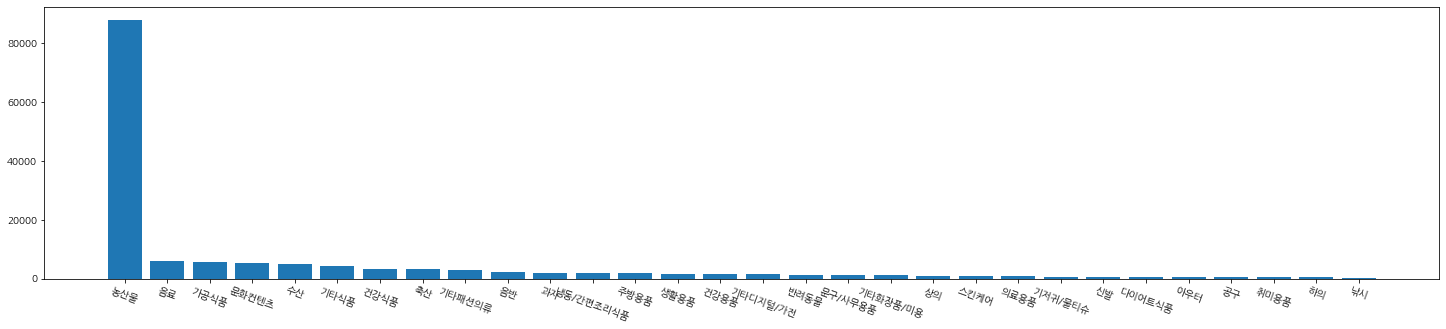

In [69]:
plt.bar(df_cnt['product'][0:30], df_cnt['cnt'][0:30], label='cnt')
plt.xticks(rotation =-20)
plt.gcf().set_size_inches(25, 5)
plt.show()

- 농산물을 제외하고 다시 보자

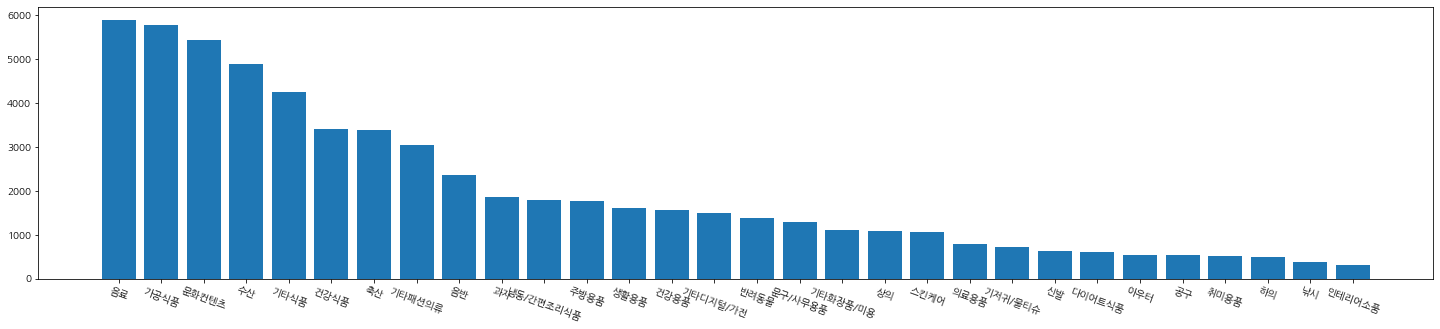

In [70]:
plt.bar(df_cnt['product'][1:31], df_cnt['cnt'][1:31], label='cnt')
plt.xticks(rotation =-20)
plt.gcf().set_size_inches(25, 5)
plt.show()

## 출발지/도착지 분석

- 출발지

In [71]:
df['start'].value_counts()

5011000078068400    3882
5013000610049100    1790
5013000731055200    1235
5011000137030100    1137
5013000821028200     731
                    ... 
4511300030055300       1
4719000321023400       1
4423000423020300       1
4711300748080100       1
2811000139076100       1
Name: start, Length: 4229, dtype: int64

In [72]:
len(df['start'].value_counts())

4229

In [73]:
# 배송 건수가 num_cnt보다 높은 것의 건수 확인
num_cnt = 5
sum(df['start'].value_counts() > num_cnt)

649

- 물품 건수가 5건 이상의 649개에 대한 출발 배송 건수가 전체 80% 이상을 차지한다.

In [77]:
num_cnt = 5
start_num = sum(df['start'].value_counts() > num_cnt)
print('start_num :', start_num)

# 전체 배송 건수 대비 num_cnt에 대한 비율
df['start'].value_counts()[:start_num].sum() / df['start'].value_counts().sum()

start_num : 649


0.82391743466734

- 도착지

In [80]:
df['end'].value_counts()

5013000635005300    35
5011000543041100    33
5011000314069300    33
5011000544072300    30
5011000318044100    30
                    ..
5011000109040100     1
4183000550093100     1
4425000028078200     1
1147000011064300     1
5011000263065200     1
Name: end, Length: 26875, dtype: int64

In [75]:
# 배송 건수가 num_cnt보다 높은 것의 건수 확인
num_cnt = 2
sum(df['end'].value_counts() > num_cnt)

820

In [78]:
# 건수가 너무 적다
num_cnt = 2
end_num = sum(df['end'].value_counts() > num_cnt)
print('end_num :', end_num)

# 전체 배송 건수 대비 num_cnt에 대한 비율
df['end'].value_counts()[:end_num].sum() / df['end'].value_counts().sum()

end_num : 820


0.1135273324075243

In [82]:
# 도착지는 2만건으로 검색해야 약 80% 비율을 맞춘다
df['end'].value_counts().head(20000).sum() / df['end'].value_counts().sum()

0.7830135083954046

In [84]:
df_start_end = pd.DataFrame({'start':df['start'].value_counts(), 'end':df['end'].value_counts()})
df_start_end.fillna(0, inplace=True)
df_start_end['total'] = df_start_end['start'] + df_start_end['end']
df_start_end

,start,end,total
1111000004097200,0.0,1.0,1.0
1111000005062300,0.0,1.0,1.0
1111000005067400,0.0,1.0,1.0
1111000007059100,0.0,1.0,1.0
1111000007071100,0.0,1.0,1.0
...,...,...,...
5013000954034200,0.0,1.0,1.0
5013000954034300,0.0,2.0,2.0
5013000954042300,0.0,1.0,1.0
5013000957072200,0.0,1.0,1.0


- 출발지와 도착지가 같은 고유번호 존재 : 반품인가?

In [86]:
df_start_end.sort_values(by='start', ascending=False)

,start,end,total
5011000078068400,3882.0,14.0,3896.0
5013000610049100,1790.0,0.0,1790.0
5013000731055200,1235.0,0.0,1235.0
5011000137030100,1137.0,2.0,1139.0
5013000821028200,731.0,0.0,731.0
...,...,...,...
4111700017060200,0.0,1.0,1.0
4111700017046100,0.0,1.0,1.0
4111700017039400,0.0,1.0,1.0
4111700017037300,0.0,1.0,1.0


## 유통경로 분석

In [87]:
df.head()

,index,start,end,product,cnt
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3


In [91]:
# 자주 배송되는 특정 경로는 없어 보인다.
df_route = df.groupby(['start', 'end'], as_index=False)['product'].count()
df_route = df_route.sort_values(by='product', ascending=False)
df_route

,start,end,product
3684,4141000031030100,5013000635005300,7
6712,4211000650079200,5011000437052400,7
735,1154500001021400,5011000214025100,5
3664,4141000031030100,5011000596012200,5
6962,4374500066090200,5011000427079100,5
...,...,...,...
10588,5011000078068400,4148000585018400,1
10587,5011000078068400,4148000557021300,1
10586,5011000078068400,4148000556065200,1
10585,5011000078068400,4148000511072200,1


In [99]:
idx = 2
s, e, p = df_route.iloc[idx, :]

df[(df['start']==s) & (df['end']==e)]

,index,start,end,product,cnt
2944,2944,1154500001021400,5011000214025100,베이스메이크업,14
14018,14018,1154500001021400,5011000214025100,바디케어,3
15826,15826,1154500001021400,5011000214025100,다이어트식품,3
22972,22972,1154500001021400,5011000214025100,클렌징,13
31630,31630,1154500001021400,5011000214025100,스킨케어,48


## 출발지 배차 분석

# 모델링